# 005 Clustering Results
* Visualization (Fig1 a, Fig1 c, and Fig S3)
* Qauntify hurricane impacts and neighborhood resilience (Table 1)
* Contexualize demographics and socioeconmoic characteristics (Table 2)

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check package versions
import types 
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

import pkg_resources
root_packages = [i.split('.', 1)[0] for i in list(imports())] 
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print (m.project_name, m.version)

('pandas', '0.24.0')
('numpy', '1.15.4')
('matplotlib', '2.2.3')


# 1. Load clustering result outputs

In [3]:
df = pd.read_csv('../../outputs/clustering_resul.csv')
# df.head()

# 2. Filtering grid cells 
* with at least 20% residential area and dropping schools and university areas (outliers)

In [4]:
# Filtering only grid cells with at least 20% residentail area and dropping schools or university areas
res = pd.read_csv('../../data/harris_county_grid_pct_res.csv')
df_res = pd.merge(df, res, on='cell_id', how='left')
# df_res.to_csv('../../result/clustering_result_grid_level_pct_res_04082020.csv', index=False)

In [5]:
df_res = df_res[df_res['pct_res']>0.2]
remove_list = ['-95.62,29.78', '-95.34,29.72', '-95.34,29.71', '-95.7,29.85',
              '-95.27,29.66','-95.28,29.66']
df_res = df_res[~df_res['cell_id'].isin(remove_list)]
print len(df_res)
# df_res.head(2)

1893


# 3. Visualize clustering results

In [6]:
myarray = df_res.iloc[:,1:55].as_matrix()
labels = df_res.iloc[:, 55].as_matrix()
# print (myarray.shape)
# print (myarray[0][:3])
# print (labels.shape)
# print (labels[:3])

In [7]:
labels_N = np.zeros([4,myarray.shape[0]])
for n in range(4):
    for i in range(len(myarray)):
        if labels[i]==n:
            labels_N[n][i]=1
        else:
            labels_N[n][i]=0

meancenter4 = np.zeros([4,myarray.shape[1]])
std4 = np.zeros([4,myarray.shape[1]])

for n in range(len(labels_N)):
    for i in range(len(myarray[0])):
        A=[]
        for j in range(len(myarray)):
            a=myarray[j][i]*labels_N[n][j]
            A.append(a)
        meancenter4[n][i] = sum(A)/sum(labels_N[n])
        std4[n][i] = np.std(np.trim_zeros(A))

In [8]:
yymmdd_list = range(54)
yymmdd_list_str = ['2017-08-04', '2017-08-05', 
                       '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11', 
                       '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', 
                       '2017-08-18', '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', 
                       '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29', 
                       '2017-08-30', '2017-08-31', '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', 
                       '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10', 
                       '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16', 
                       '2017-09-17', '2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22', 
                       '2017-09-23', '2017-09-24', '2017-09-25', '2017-09-26']

### Creat Fig1.

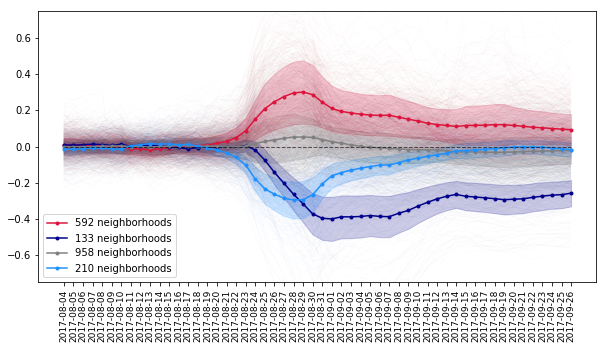

In [9]:
fig = plt.figure(figsize=(10,5))
plt.xticks(yymmdd_list,yymmdd_list_str, rotation=90, fontsize=9)
colors = ['crimson', 'darkblue', 'grey', 'dodgerblue']

for i in range(len(myarray)):
    for n in range(4):
        if labels[i]==n:
            plt.plot(yymmdd_list, myarray[i], color=colors[n], alpha=0.1, linewidth=0.1)

    
for i in range(len(labels_N)):
    plt.plot(yymmdd_list, meancenter4[i], marker='o' ,markersize=3, color=colors[i], linewidth=1.5,
            label = "%s neighborhoods"%(Counter(labels)[i]))

    # fill_between
    x1 = np.arange(len(std4[i]))
    f1 = meancenter4[i]+std4[i]
    f2 = meancenter4[i]-std4[i]
    plt.fill_between(x1, f1, f2, alpha=0.2, color=colors[i])
    
plt.plot(yymmdd_list, [0]*54, color='Black', linewidth = 1, linestyle='--', alpha=0.6)
plt.legend(loc = 'lower left')
plt.ylim(-0.75,0.75)
plt.grid('off')
# plt.savefig('../../figures/Fig1_a.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

### By group

In [10]:
def plot_result_group(g):
#     plt.xticks(yymmdd_list,yymmdd_list_str, rotation=90, fontsize=9)
    colors = ['crimson', 'darkblue', 'grey', 'dodgerblue']

    for i in range(len(myarray)):
        for n in range(4):
            if labels[i]==g:
                plt.plot(yymmdd_list, myarray[i], color=colors[g], alpha=0.1, linewidth=0.05)

    for i in range(len(labels_N)):
        if i == g:
            plt.plot(yymmdd_list, meancenter4[i], marker='o' ,markersize=3, color=colors[g], linewidth=1.5,
                    label = "%s neighborhoods"%(Counter(labels)[i]))

            # fill_between
            x1 = np.arange(len(std4[i]))
            f1 = meancenter4[i]+std4[i]
            f2 = meancenter4[i]-std4[i]
            plt.fill_between(x1, f1, f2, alpha=0.2, color=colors[g])
            plt.fill_between(x1, meancenter4[i], alpha=0.6, color='k')

    plt.plot(yymmdd_list, [0]*54, color='Black', linewidth = 1, linestyle='--', alpha=0.6)
    plt.legend(loc = 'upper right')
    plt.ylim(-0.75,0.75)
    plt.grid(linewidth=0.5, alpha=0.5)

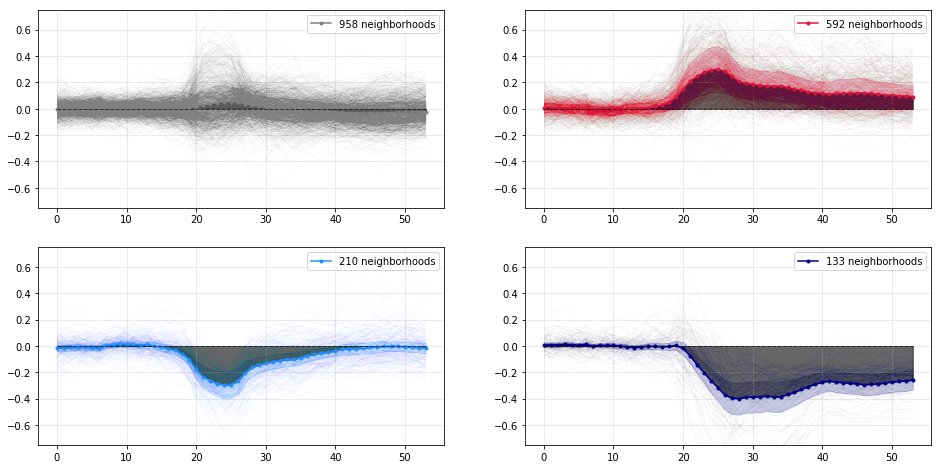

In [11]:
fig = plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plot_result_group(2)

plt.subplot(2,2,2)
plot_result_group(0)

plt.subplot(2,2,3)
plot_result_group(3)

plt.subplot(2,2,4)
plot_result_group(1)

plt.show()

### Create FigS3.

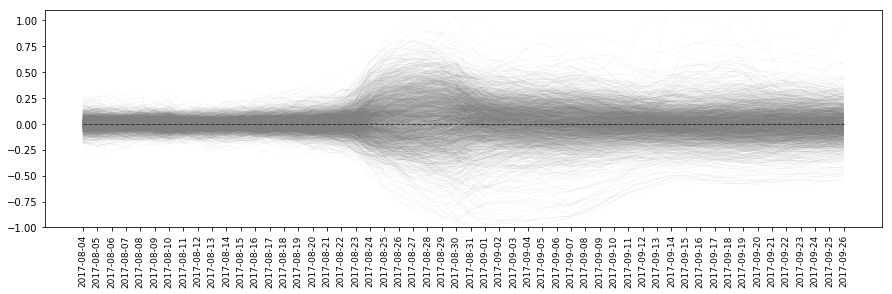

In [12]:
fig = plt.figure(figsize=(15,4), dpi=300)
plt.xticks(yymmdd_list,yymmdd_list_str, rotation=90, fontsize=9)

for i in range(len(myarray)):
    plt.plot(yymmdd_list, myarray[i], color='grey', alpha=0.2, linewidth=0.2)
    
plt.plot(yymmdd_list, [0]*54, color='Black', linewidth = 1, linestyle='--', alpha=0.6)
plt.ylim(-1,1.1)
plt.grid('off')

# plt.savefig('../../figures/FigS3.svg', format='svg', dpi=300, 
#             bbox_inches='tight')
plt.show()

In [13]:
# df_res.head()

### Create Fig1. (case study)
* Below needs a manual case study to identify neighborhood disaster response and resilience patterns. 

In [14]:
# dec1: -95.37, 29.72 Riverside terrace (multifamily housing area) c = 90
# -95.4,29.9 Northfield place neighborhood (mixed residential area with lots of auto shops) c= 110
# -95.35,29.69 Greater OST / SOUTH UNION neighborhoods with multifamily (mostly lower income) housings c = 85
# stabel: -95.2,29.66 Pasadena Westside terrace (mix of residential + cormmercial) c=170
# -95.39,30.06  North Spring (c=390)
# -95.45,29.82 Central northwest (c=490) mix of residentail + commercial 
# inc: -95.4,29.98 Imperial green neighborhood (single housing area)
# -95.48,29.7 Shenandoah neighborhood (single housing area)
# -95.53,29.76 Bunker Hill Village (single housing - like big mansions area) c = 355
# -95.53,29.77 Bunker Hill Village (single housing - like big mansions area) c = 356
# -95.68,29.9 Copper lakes neighborhood c = 500
# -95.76,30.01 Fairfield village south c=570
# dec2: -95.18,29.52 near clear creek c=16 (Forest creek neighborhood)
# -95.18,30.04 near Kingwood neighborhood (near river area)
# -95.19,29.59 near Turkey creek (southbelt/Ellington neighborhood)
# -95.51,30.01 Cypress hill and courthouse area
# -95.62,29.78 Reservoir area (shell/BP employee's residential areas)

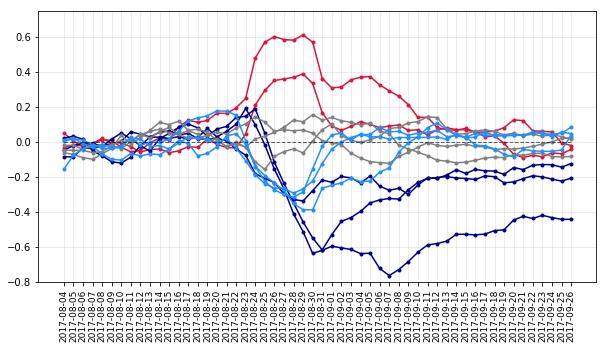

In [15]:
colors = ['crimson', 'darkblue', 'grey', 'dodgerblue']

fig = plt.figure(figsize=(10,5), dpi=300)
plt.xticks(yymmdd_list,yymmdd_list_str, rotation=90, fontsize=9)

# for i in range(len(myarray)):
#     plt.plot(yymmdd_list, myarray[i], color='grey', alpha=0.2, linewidth=0.2)

# c = 356
# plt.plot(yymmdd_list, tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[0], marker='o', markersize=3, label = tmp.iloc[c,0])
tmp = df_res[df_res['label']==0]
c  = 356
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[0], marker='o', markersize=3, label = tmp.iloc[c,0])

c  = 500
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[0], marker='o', markersize=3, label = tmp.iloc[c,0])
# c  = 570
# plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[0], marker='o', markersize=3, label = tmp.iloc[c,0])

tmp = df_res[df_res['label']==1]
c  = 16
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[1], marker='o', markersize=3, label = tmp.iloc[c,0])
c  = 28
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[1], marker='o', markersize=3, label = tmp.iloc[c,0])
c  = 3
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[1], marker='o', markersize=3, label = tmp.iloc[c,0])

tmp = df_res[df_res['label']==2]
c  = 170
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[2], marker='o', markersize=3, label = tmp.iloc[c,0])
c  = 390
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[2], marker='o', markersize=3, label = tmp.iloc[c,0])
c  = 490
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[2], marker='o', markersize=3, label = tmp.iloc[c,0])

tmp = df_res[df_res['label']==3]
c  = 90
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[3], marker='o', markersize=3, label = tmp.iloc[c,0])
c  = 110
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[3], marker='o', markersize=3, label = tmp.iloc[c,0])
c  = 85
plt.plot(yymmdd_list,  tmp.iloc[c,1:1+len(yymmdd_list)], color=colors[3], marker='o', markersize=3, label = tmp.iloc[c,0])
    
plt.plot(yymmdd_list, [0]*54, color='Black', linewidth = 1, linestyle='--', alpha=0.6)
plt.ylim(-0.8,0.75)
plt.grid(linewidth=0.5, alpha=0.5)


# plt.ylabel("Community activity change (%)", fontsize=15)
# plt.legend(bbox_to_anchor=(1.05,1.05))
# plt.savefig('../image/Fig1_c.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# 4. Quantify hurricane impact

In [16]:
for i in range(4):
    print (df_res['height'][df_res['label']==i].mean())
print ('-----')
for i in range(4):
    print (df_res[df_res['label']==i]['depth'].mean())
print ('-----')
for i in range(4):
    print (df_res[df_res['label']==i]['auc_2'].mean())    

0.368495188691
0.0516137587939
0.162314648296
-0.0113560755865
-----
0.0102370262589
-0.479841640749
-0.11696600756
-0.336125672726
-----
5.66556943572
-9.85576265879
-0.0933879499026
-3.62303909892


# 5. Contexualize demographic and socioeconomic characteristics

In [17]:
# Load demographic and socioeconomic data
ch = pd.read_csv('../../data/independent_variables.csv')
ch.head(2)

,GEOID_Data,pct_pop_age_lt_18,pct_pop_age_18_30,pct_pop_age_gt_65,med_building_age,pct_hh_computer,pct_pop_disability,pct_high_edu,pct_low_edu,pct_lim_Eng,...,pct_single_housing,pct_multi_housing,pct_commercial,pct_industrial,pct_lower,pct_flood,pct_surge,cat_evacuation,dist_shelter,prox_road
0,14000US48201100000,0.020374,0.210314,0.062818,52.0,0.955337,0.129,0.265,0.211,0.017,...,0.429126,0.024213,0.288041,0.002492,0.129450,0.214511,0.0,NaN,858.749362,941.338876
1,14000US48201210100,0.016475,0.437460,0.008477,40.0,1.000000,0.229,0.014,0.415,0.000,...,0.042335,0.018153,0.248999,0.000000,0.327097,0.448101,0.0,NaN,1535.535316,288.993681


In [18]:
# Load grid cell id and census tract id information
gr_ct = pd.read_csv('../../data/grid_cell_ct_joined.csv')
gr_ct = gr_ct[['cell_id', 'GEOID_Data']]
gr_ct.head(2)

,cell_id,GEOID_Data
0,"-95.96,30.24",14000US48185180102
1,"-95.95,30.24",14000US48185180102


In [19]:
df_res = pd.merge(df_res, gr_ct, how='left', on='cell_id')

In [20]:
re = pd.merge(df_res[['GEOID_Data', 'cell_id','label','auc', 'auc_2', 'depth', 'height']], ch, on='GEOID_Data', how='left')
re.head(2)

,GEOID_Data,cell_id,label,auc,auc_2,depth,height,pct_pop_age_lt_18,pct_pop_age_18_30,pct_pop_age_gt_65,...,pct_single_housing,pct_multi_housing,pct_commercial,pct_industrial,pct_lower,pct_flood,pct_surge,cat_evacuation,dist_shelter,prox_road
0,14000US48201253200,"-94.92,29.77",1,29.657116,-8.782201,-0.356454,0.217955,0.29149,0.167982,0.116866,...,0.29042,0.007005,0.139637,0.030709,0.18776,0.27764,0.000695,B,1585.398783,1837.70875
1,14000US48201253200,"-94.92,29.78",1,29.725394,-9.033018,-0.420922,0.135218,0.29149,0.167982,0.116866,...,0.29042,0.007005,0.139637,0.030709,0.18776,0.27764,0.000695,B,1585.398783,1837.70875


In [21]:
col_list = [ 'pct_pop_age_lt_18', 'pct_pop_age_18_30', 'pct_pop_age_gt_65', 'med_building_age', 
            'pct_hh_computer', 'pct_pop_disability', 'pct_high_edu', 'pct_low_edu', 'pct_lim_Eng', 
            'pct_lim_Eng_Spanish', 'pct_lim_Eng_Euro', 'pct_lim_Eng_Asian', 'pct_white', 'pct_black', 
            'pct_asian', 'pct_other', 'hhi_race', 'pct_hh_food_stamp', 'pct_foreign', 'gini_coeff', 
            'pct_no_health_insu', 'pct_hh_kids_6', 'pct_hh_kids_6_18', 'pct_hh_alone', 'avg_hh_size', 
            'pct_hispanic', 'pct_hu_owned', 'pct_hu_mobile', 'pct_hh_income_lt_25k', 
            'pct_hh_income_25_75k', 'pct_hh_income_gt_75k', 'med_income', 'pct_hh_no_internet', 
            'pct_hh_poverty', 'med_room', 'pct_pop_unemp', 'pct_hu_vacant', 'pct_hh_vehicle', 
            'pct_pop_veteran', 'pop_den', 'pct_open_space', 'pct_single_housing', 'pct_multi_housing', 
            'pct_commercial', 'pct_industrial', 'pct_lower', 'pct_flood', 'dist_shelter', 
            'prox_road']


for c in col_list:
    if c in ['med_building_age', 'pct_hh_computer', 'pct_high_edu', 'pct_low_edu', 'hhi_rage',
            'gini_coeff', 'avg_hh_size', 'pct_hu_owned', 'pct_hh_income_lt_25k', 
            'pct_hh_income_25_75k', 'pct_hh_income_gt_75k', 'med_income', 'pct_hh_no_internet', 'med_room',
            'pct_pop_unemp', 'pct_hh_vehicle', 'pop_den', 
             'pct_single_housing', 'pct_multi_housing', 
            'pct_commercial', 'dist_shelter', 
            'prox_road']:
        re[c] = re[c].replace(np.nan, re[c].mean())
    else:
        re[c] = re[c].replace(np.nan, 0)
        
re['cat_evacuation'][re['cat_evacuation']=='A'] = 1
re['cat_evacuation'][re['cat_evacuation']=='B'] = 1
re['cat_evacuation'][re['cat_evacuation']=='C'] = 1
re['cat_evacuation'][re['cat_evacuation']!=1] = 0
re['cat_evacuation'] = re['cat_evacuation'].astype(float)

col_list = col_list + ['cat_evacuation']

### One-way ANOVA test

In [ ]:
import scipy.stats as stats
anova_value = []
anova_pvalue = []
for col in col_list:
    print (col)
    group = ['inc', 'dec2', 'stable', 'dec1']
    inc = re[col][re['label']==0].values
    dec2 = re[col][re['label']==1].values
    stable = re[col][re['label']==2].values
    dec1 = re[col][re['label']==3].values
    print (stats.f_oneway(inc, dec2, stable, dec1)[0].round(4))
    anova_value.append(stats.f_oneway(inc, dec2, stable, dec1)[0].round(4))
    print (stats.f_oneway(inc, dec2, stable, dec1)[1].round(4))
    anova_pvalue.append(stats.f_oneway(inc, dec2, stable, dec1)[1].round(4))
    print ('_______________')

### Tukey test

In [23]:
import statsmodels.stats.multicomp as multi

# np.random.seed(0)
# x = np.random.choice(['A','B','C'], 50)
# y = np.random.rand(50)

# mcDate = multi.MultiComparison(y,x)
# Results = mcDate.tukeyhsd()
# print (Results)

In [24]:
re['label_'] = re['label'].astype(str)
re['label_'] = 'Stable'
re['label_'][re['label']==0] = 'Increasing'
re['label_'][re['label']==1] = 'Decreasing2'
re['label_'][re['label']==3] = 'Decreasing1'

In [ ]:
for col in col_list:
    print ("-------------",col,"----------------")
    mcDate = multi.MultiComparison(re[col],re['label_'])
    Results = mcDate.tukeyhsd()
    print (Results)    

# 6. Create a summary table

In [26]:
mean_std_list_total = []
for col in col_list:
    #print col
    mean_std_list = []
    for i in [0,1,2,3]:
        group = ['inc', 'dec2', 'stable', 'dec1']
        mean = re[col][re['label']==i].mean()
        std = re[col][re['label']==i].std()
        mean_std = round(mean,4), round(std,4)
        mean_std_list.append(mean_std)
    mean_std_list_total.append(mean_std_list)

In [27]:
df_summary = pd.DataFrame(mean_std_list_total)
df_summary['feature'] = col_list
df_summary.columns = ['inc', 'dec2', 'stable', 'dec1', 'feature']
df_summary = df_summary[['feature','stable', 'inc', 'dec1', 'dec2']]

for c in ['stable', 'inc', 'dec1', 'dec2']:
    df_summary[c] = df_summary[c].astype(str).str.replace('(','')
    df_summary[c] = df_summary[c].astype(str).str.replace(', ',' (')

# df_summary

In [28]:
df_summary_anova = pd.DataFrame()
df_summary_anova['feature'] = col_list
df_summary_anova['anova'] = anova_value
df_summary_anova['pvalue'] = anova_pvalue

df_summary = pd.merge(df_summary, df_summary_anova, how='outer', on='feature')
df_summary

,feature,stable,inc,dec1,dec2,anova,pvalue
0,pct_pop_age_lt_18,0.2664 (0.0624),0.2769 (0.0649),0.2632 (0.078),0.2522 (0.0654),6.8508,0.0001
1,pct_pop_age_18_30,0.1632 (0.0537),0.1554 (0.0503),0.177 (0.0579),0.1564 (0.0615),9.0093,0.0000
2,pct_pop_age_gt_65,0.1009 (0.0427),0.0954 (0.0497),0.0996 (0.0478),0.1197 (0.0492),10.2000,0.0000
3,med_building_age,34.8811 (15.5504),31.7471 (15.99),39.3411 (14.1766),35.0362 (14.0994),13.3666,0.0000
4,pct_hh_computer,0.8883 (0.1032),0.8986 (0.0972),0.8416 (0.1264),0.9039 (0.1045),16.8921,0.0000
5,pct_pop_disability,0.0938 (0.0388),0.089 (0.0392),0.0959 (0.0453),0.0923 (0.0361),2.4426,0.0625
6,pct_high_edu,0.111 (0.1007),0.1041 (0.0877),0.1007 (0.1149),0.1534 (0.1262),9.5543,0.0000
7,pct_low_edu,0.2276 (0.0882),0.2349 (0.0828),0.2462 (0.1034),0.1939 (0.0984),10.3669,0.0000
8,pct_lim_Eng,0.1056 (0.1143),0.1005 (0.1149),0.1453 (0.146),0.0892 (0.1243),8.8524,0.0000
9,pct_lim_Eng_Spanish,0.2167 (0.1736),0.2047 (0.169),0.2768 (0.2024),0.173 (0.1884),11.7193,0.0000


# 7. Export a summary table

In [29]:
# df_summary.to_csv('../../outputs/cluster_groups_characteristics_summary_table.csv', index=False)